In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import os
import csv
import sys

from collections import defaultdict, Counter

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set()
sb.set_style("dark")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [2]:
df = pd.read_csv("D:\Open Classroom\Data Files\IMDB\imdb_top_1000.csv")
df.drop(columns = ["Poster_Link"], inplace = True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


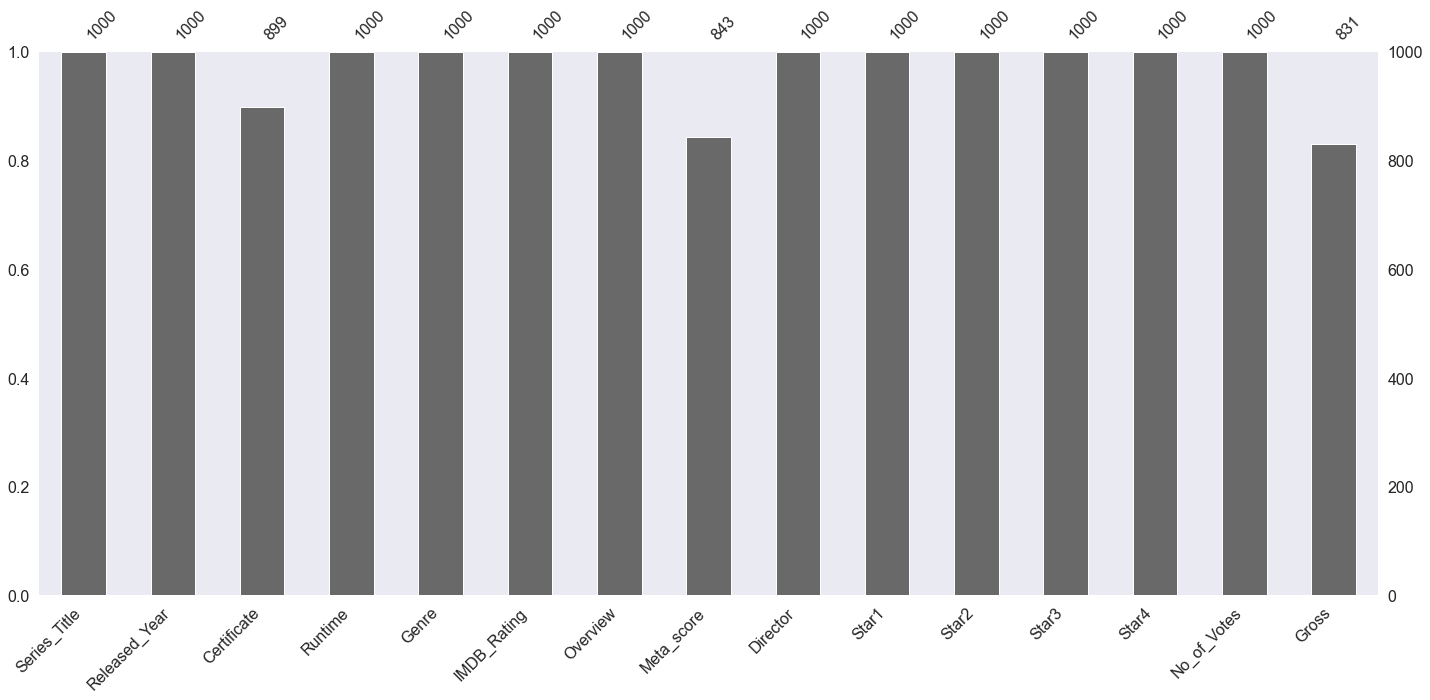

In [3]:
msno.bar(df)

In [4]:
df[["Meta_score", "Gross"]] = df[["Meta_score", "Gross"]].replace(np.nan, 0)

In [5]:
df.dropna(axis = "index", how = "any", inplace = True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
round(df.groupby("Released_Year").agg({"No_of_Votes": "mean"}), 2).sort_values(by = "No_of_Votes", ascending = False).rename(columns = {"No_of_Votes": "Votes (Mean)"}).head(7).style.background_gradient(cmap = "viridis")

,Votes (Mean)
Released_Year,
1994,666532.150000
1977,556087.330000
1999,536961.060000
2010,485102.100000
2008,482301.740000
2012,432502.950000
2014,424046.160000


In [7]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   899 non-null    object 
 1   Released_Year  899 non-null    object 
 2   Certificate    899 non-null    object 
 3   Runtime        899 non-null    object 
 4   Genre          899 non-null    object 
 5   IMDB_Rating    899 non-null    float64
 6   Overview       899 non-null    object 
 7   Meta_score     899 non-null    float64
 8   Director       899 non-null    object 
 9   Star1          899 non-null    object 
 10  Star2          899 non-null    object 
 11  Star3          899 non-null    object 
 12  Star4          899 non-null    object 
 13  No_of_Votes    899 non-null    int64  
 14  Gross          899 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 112.4+ KB


In [8]:
#df.loc[(i for i in range(0, len(df["Runtime"]))), ["Runtime"]][0:3]

In [9]:
len(df["Runtime"])

899

In [12]:
df.sample()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
469,Isle of Dogs,2018,U,101 min,"Animation, Adventure, Comedy",7.9,"Set in Japan, Isle of Dogs follows a boy's ody...",82.0,Wes Anderson,Bryan Cranston,Koyu Rankin,Edward Norton,Bob Balaban,139114,"32,015,231"


In [10]:
#df.groupby("Released_Year").agg({"Gross": "sum"})#.rename({"Gross": "Gross (Mean)"}).style.background_gradient(cmap = "viridis")

In [22]:
with open("D:\Open Classroom\Data Files\IMDB\imdb_top_1000.csv", encoding = "utf-8") as file:
    fileReader = csv.DictReader(file)
    fileCounter = Counter()
    
    for col in fileReader:
        fileCounter.update(col["Genre"].split(", "))
        
genre = []
choice = []

for i in fileCounter.most_common(None):
    genre.append(i[0])
    choice.append(i[1])

print(fileCounter.most_common(20))

[('Drama', 724), ('Comedy', 233), ('Crime', 209), ('Adventure', 196), ('Action', 189), ('Thriller', 137), ('Romance', 125), ('Biography', 109), ('Mystery', 99), ('Animation', 82), ('Sci-Fi', 67), ('Fantasy', 66), ('History', 56), ('Family', 56), ('War', 51), ('Music', 35), ('Horror', 32), ('Western', 20), ('Film-Noir', 19), ('Sport', 19)]
